In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [124]:
df = pd.read_csv("train.csv")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [126]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Testing different values to fill null values. The following methods will be used:
1. Forward fill
2. Back fill
3. Linear regression model

# 1. Forward Fill

In [128]:
# Applying a forward fill method for the null values in Age
df_ffill = df.copy(deep=True)
df_ffill['Age'].fillna(method='pad', inplace=True)
df_ffill[df_ffill['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [155]:
df_ffill['Pclass'].unique()

array([3, 1, 2], dtype=int64)

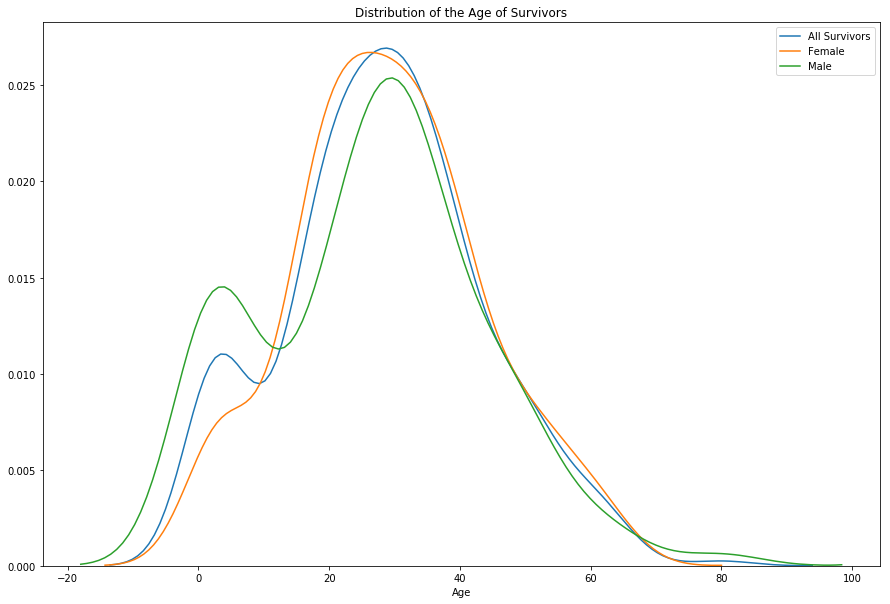

In [129]:
fig = plt.figure(figsize=(15,10))
plt.title('Distribution of the Age of Survivors')

sns.distplot(df_ffill[df_ffill['Survived'] == 1]['Age'], bins=25, hist=False, label='All Survivors')
sns.distplot(df_ffill[(df_ffill['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], bins=25, hist=False, label='Female')
sns.distplot(df_ffill[(df_ffill['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], bins=25, hist=False, label='Male')
plt.show()

From the distribution plot, it appears that most of the people who survived are between ages 18 - 40. Interestingly, the male survivor distribution seems to mirror that of the "all survivors" distribution. On the other hand, female survivor distribution largely mirrors the former two distributions, except that there is a dip in the proportion of young females who survived (ages <10). This might be worth looking at later.

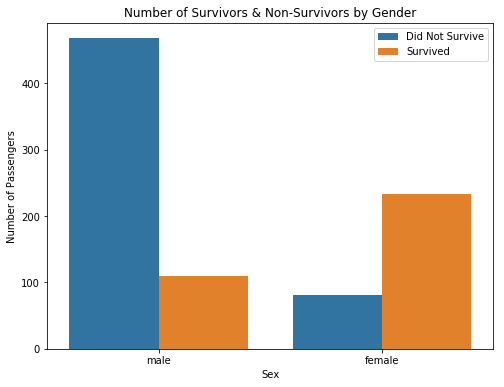

In [289]:
fig = plt.figure(figsize=(8,6))
plt.title('Number of Survivors & Non-Survivors by Gender')
graph = sns.countplot(x=df_ffill['Sex'], hue=df_ffill['Survived'])
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')

#for p, label in zip(graph.patches, df_ffill['Sex'].value_counts()):
#    graph.annotate(label, (p.get_x() +0.15, p.get_height()+0.3))

plt.show()

This chart shows that there are 

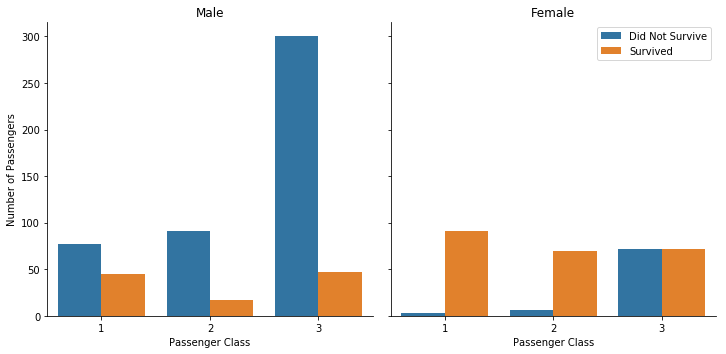

In [242]:
# Removing the legend with legend=False
graph = sns.catplot(data=df_ffill, x='Pclass', hue='Survived', col='Sex', kind='count', legend=False)

axes = graph.axes.flatten()

# Creating new legend here and changing the labels to more appropriately reflect the information
axes[1].legend(['Did Not Survive', 'Survived'])

# Changing the titles of each graph
axes[0].set_title("Male")
axes[1].set_title("Female")

# Changing the labels of x-axis and y-axis
axes[0].set_ylabel("Number of Passengers")
for ax in axes:
    ax.set_xlabel("Passenger Class")



plt.show()

In [259]:
age_range = []
for age in df_ffill['Age']:
    if 0 < age <= 18:
        age_range.append('Minor')
    elif 19 < age <= 50:
        age_range.append('Adult')
    else:
        age_range.append('Senior')

In [262]:
df_ffill['Age Group'] = age_range
df_ffill.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Minor
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Minor


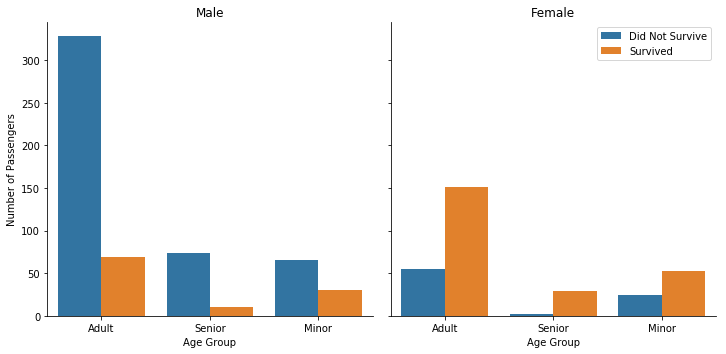

In [265]:
graph = sns.catplot(data=df_ffill, x='Age Group', hue='Survived', col='Sex', kind='count', legend=False)


axes = graph.axes.flatten()

# Creating new legend here and changing the labels to more appropriately reflect the information
axes[1].legend(['Did Not Survive', 'Survived'])

# Changing the titles of each graph
axes[0].set_title("Male")
axes[1].set_title("Female")

# Changing the labels of x-axis and y-axis
axes[0].set_ylabel("Number of Passengers")
for ax in axes:
    ax.set_xlabel("Age Group")